# Recommendation Models

This challenge is about creating recommendation models. Moving away from CEAPS data, here I use the MovieLens 100K dataset, where we have available 100k movie ratings from 1k users on 1.7k movies.

The idea is to try some different approaches for recommending movies to people, like, randonly, most-popular and possibly getting to a ML model to consider multiple factors.

## Preparing Data

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('./movie-lens-dataset/u.data', sep='\t', names=['user id','item id','rating','timestamp'])
df.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [15]:
movies_df = pd.read_csv('./movie-lens-dataset/u.item', sep='|', encoding='latin', names=['id','title','release','video_release','url', 'unknown','action','adventure','animation','children','comedy','crime','documentary','drama','fantasy','noir','horror','musical','mystery','romance','sci-Fi','thriller','war','western'])
movies_df.head()

,id,title,release,video_release,url,unknown,action,adventure,animation,children,...,fantasy,noir,horror,musical,mystery,romance,sci-Fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1682 non-null   int64  
 1   title          1682 non-null   object 
 2   release        1681 non-null   object 
 3   video_release  0 non-null      float64
 4   url            1679 non-null   object 
 5   unknown        1682 non-null   int64  
 6   action         1682 non-null   int64  
 7   adventure      1682 non-null   int64  
 8   animation      1682 non-null   int64  
 9   children       1682 non-null   int64  
 10  comedy         1682 non-null   int64  
 11  crime          1682 non-null   int64  
 12  documentary    1682 non-null   int64  
 13  drama          1682 non-null   int64  
 14  fantasy        1682 non-null   int64  
 15  noir           1682 non-null   int64  
 16  horror         1682 non-null   int64  
 17  musical        1682 non-null   int64  
 18  mystery 

In [17]:
movies_df.drop('video_release', axis=1, inplace=True)

In [18]:
user_df = pd.read_csv('./movie-lens-dataset/u.user', sep='|', names=['id','age','gender','occupation','zipcode'])
user_df.head()

,id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [19]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zipcode     943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


## Random Approach

There are multiple approaches for recommendation systems. The simplest one is, I dare to say, is random recommendation. Although random recommendation has a high possibility to recommend something a user don't want, it also gives equal chances to every item in the catalog to be displayed. On this approach, items that didn't get very consumed yet have a chance to be tasted and raise its popularity. When a long-tail item like this gets consumed and rated by someone, it benefits it not just for popularity-based algorithms, but also to collaborative filtering approaches. 

In [43]:
random_movies_recommendation = df.sample(n = 10, random_state=32).reset_index(drop=True)
random_movies_recommendation.drop(['rating', 'timestamp', 'user id'], axis=1, inplace=True)
random_movies_recommendation.head()


,item id
0,133
1,144
2,389
3,628
4,17


In [44]:
random_movies_recommendation['title'] = pd.merge(random_movies_recommendation, movies_df, left_on='item id', right_on='id', how='left')['title']
random_movies_recommendation

Just here I noticed that my selection could endup having duplicates, as I didn't group the main DF by Item Id. Although, as it brought me different movies, it is enough for demonstration purposes of the Random Recommendation Approach.

In [37]:
items_ratings_count = df.groupby('item id')[['rating']].count().reset_index()
random_movies_recommendation = pd.merge(random_movies_recommendation, items_ratings_count, left_on='item id', right_on='item id', how='left')
random_movies_recommendation

<Axes: ylabel='title'>

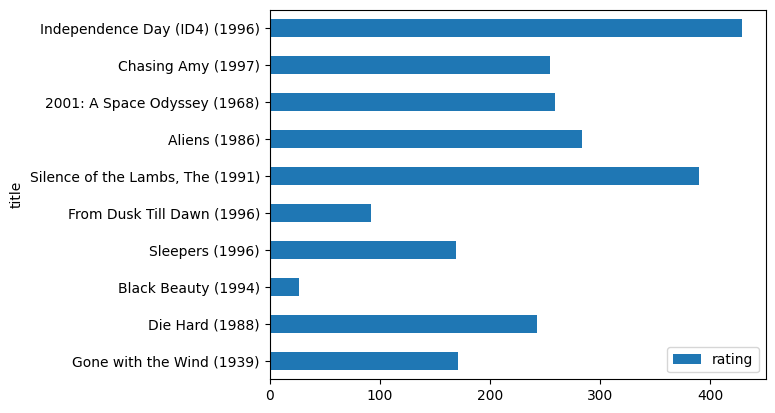

In [50]:
random_movies_recommendation.plot(kind='barh', x='title', y='rating')

And that is the catch with random approach, movies not that popular get a chance to display alongside the popular ones (compare Black Beauty with Independence Day for example).

## Most Popular Approach

One of the simplest approaches for recommendation systems is based on popularity. Yes it has its downsides, it is not 'fair' to long-tail items(see https://www.kaggle.com/code/saurav9786/recommender-system-using-amazon-reviews and https://arxiv.org/pdf/1907.13286), but on a 7-days code challenge, it is a start.

In [21]:
movies_popularity_order = df.groupby('item id')[['rating']].count().sort_values(by='rating', ascending=False).reset_index()

In [22]:
movies_popularity_order['title'] = pd.merge(movies_popularity_order, movies_df, left_on='item id', right_on='id', how='left')['title']
movies_popularity_order.head(12)

,item id,rating,title
0,50,583,Star Wars (1977)
1,258,509,Contact (1997)
2,100,508,Fargo (1996)
3,181,507,Return of the Jedi (1983)
4,294,485,Liar Liar (1997)
5,286,481,"English Patient, The (1996)"
6,288,478,Scream (1996)
7,1,452,Toy Story (1995)
8,300,431,Air Force One (1997)
9,121,429,Independence Day (ID4) (1996)


### Top 12 popular movies

<Axes: ylabel='title'>

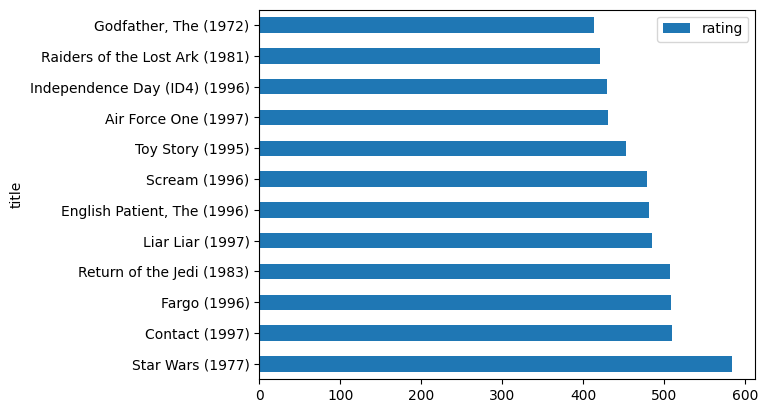

In [23]:
movies_popularity_order.head(12).plot(kind='barh', x='title', y='rating')

Of course this approach does not consider how good each movie really is, in terms of good reviews, so, for that we would change it slightly.

### Top 12 best movies

In [24]:
best_movies_order = df.groupby('item id')[['rating']].mean().sort_values(by='rating', ascending=False).reset_index()
best_movies_order['title'] = pd.merge(best_movies_order, movies_df, left_on='item id', right_on='id', how='left')['title']

best_movies_order.head(12)

,item id,rating,title
0,814,5.000,"Great Day in Harlem, A (1994)"
1,1599,5.000,Someone Else's America (1995)
2,1201,5.000,Marlene Dietrich: Shadow and Light (1996)
3,1122,5.000,They Made Me a Criminal (1939)
4,1653,5.000,Entertaining Angels: The Dorothy Day Story (1996)
5,1293,5.000,Star Kid (1997)
6,1500,5.000,Santa with Muscles (1996)
7,1189,5.000,Prefontaine (1997)
8,1536,5.000,Aiqing wansui (1994)
9,1467,5.000,"Saint of Fort Washington, The (1993)"


<Axes: ylabel='title'>

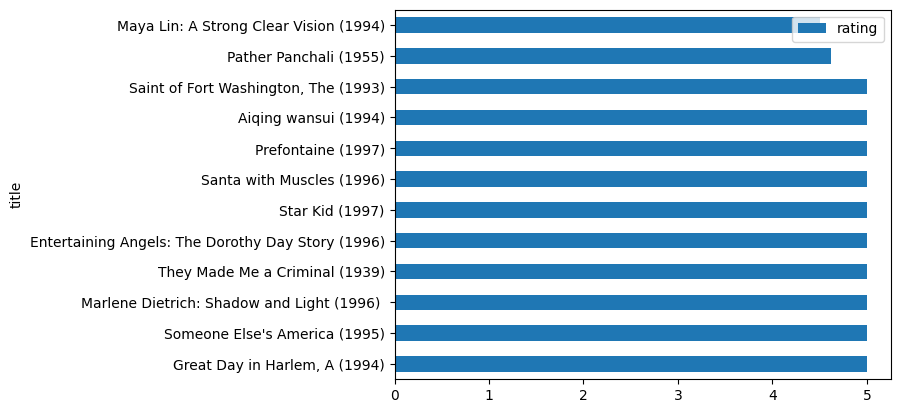

In [25]:
best_movies_order.head(12).plot(kind='barh', x='title', y='rating')

Another problem with this approach is that, it will keep very specific items in the top. Only the best items will ever display. Plus, as it is possible to have inumerous items with rating 5 or close to it, it makes it hard even to good items to show on top.

Given that, if a Most Popular recommendation system is really desired, I would approach it getting the items sorted by popularity, good or bad, and take a random subset of it as result, aiming to give equal chances to all popular items to display to the users.

I don't know about you, but, too popular pop culture stuff tend to push me away if I hear too much about it before even consuming it. Example, Avatar 2. Never watched. Don't think I ever will. Why? Not sure, a mix of feelings. I know it is a good movie, the first one was. The director is good. I like adventure and action movies. BUT, there is too much hype over it, too much blind devotion to the director... that removes from me any desire of ever watching it. All that to get to the point I wanted. I believe I am not the only one who thinks like that. And, by the little research I did around recommendation systems, I could see that there are studies around how such systems can perform better for a public that don't like to consume only popular stuff.

So we have different, better, approaches for recommending stuff that falls in the interest of users. One of them is Collaborative filtering.

## Collaborative Filtering

With collaborative approach, we take a user's preferrence into account, recommending items consumed by people of similar tastes.

Instead recreating the wheel and spending some hours generating an algorithm to recommend items based on collaborative approach, we can take the example from Saurav Anand, https://www.kaggle.com/code/saurav9786/recommender-system-using-amazon-reviews, and use Surprise library for this.

_Note: Not that I don't have the interest of getting to know and implement such algorithms in details, but it is kind not the moment of my data scientist journey yet._